# Preparation de l'environnement de travail

## Accès aux données : Importation du dataset Kaggle  

Ce notebook utilise un dataset public de Kaggle, nécessitant une authentification pour y accéder.  
La cellule suivante permet de se connecter à Kaggle avec `kagglehub.login()`. Assurez-vous que votre clé API Kaggle est bien configurée avant d'exécuter cette étape. Coller la clé API dans le formulaire de login qui va s'afficher à l'output.  


In [2]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


## Téléchargement du dataset  

Après l'authentification, nous téléchargeons les données grâce à `kagglehub.dataset_download()`.  


In [3]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

loziadam_engiedata_path = kagglehub.dataset_download('loziadam/engiedata')

print('Data source import complete.')


Data source import complete.


## Configuration de l'environnement  

Malgré importé de Kaggle, ce notebook fonctionne dans un environnement Python de Colab, qui inclut de nombreuses bibliothèques préinstallées. Importons des packages essentiels (`numpy`, `pandas`) pour le traitement des données et vérifions le chemin du dataset en listant les fichiers extraits afin de s’assurer que tout est bien chargé.  


In [4]:
#code pour vérifier les chemins des fichiers ()
#numpy (np), pandas (pd), seaborn (sns), matplotlib.pyplot (plt)

import numpy as np
import pandas as pd


print(loziadam_engiedata_path)

import os
for dirname, _, filenames in os.walk(loziadam_engiedata_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/engiedata
/kaggle/input/engiedata/engie_X.csv
/kaggle/input/engiedata/engie_Y.csv


## Importation des bibliothèques et chargement des données  

Nous commençons par importer les bibliothèques nécessaires et charger les fichiers `engie_X.csv` et `engie_Y.csv`. Ensuite, nous les fusionnons sur la colonne `ID` afin d’avoir un seul DataFrame contenant les caractéristiques et la cible.


In [5]:

import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")


X = pd.read_csv(os.path.join(loziadam_engiedata_path, "engie_X.csv"),sep=';')
y=pd.read_csv(os.path.join(loziadam_engiedata_path,"engie_Y.csv"), sep=';')


data= pd.merge(X, y, on='ID', how='inner') #inner est par defaut déja


print(data.head())

   ID MAC_CODE  Date_time  Pitch_angle  Pitch_angle_min  Pitch_angle_max  \
0   1      WT3        1.0    92.470001        92.470001        92.470001   
1   2      WT3        2.0    92.470001        92.470001        92.470001   
2   3      WT3        3.0    92.470001        92.470001        92.470001   
3   4      WT3        4.0    92.470001        92.470001        92.470001   
4   5      WT3        5.0    92.470001        92.470001        92.470001   

   Pitch_angle_std  Hub_temperature  Hub_temperature_min  Hub_temperature_max  \
0              0.0             7.00                  7.0                  7.0   
1              0.0             7.00                  7.0                  7.0   
2              0.0             7.00                  7.0                  7.0   
3              0.0             6.97                  6.7                  7.0   
4              0.0             6.93                  6.0                  7.0   

   ...  Rotor_speed_min  Rotor_speed_max  Rotor_speed_st

# Exploratory Data Analysis

## Exploration des dimensions et des types de données  


- Dimensions  
- Types des variables  
- Statistiques descriptives


In [6]:
print(f"Data shape: {data.shape}")
print("nombre d'induvidus", data.shape[0])
print("nombre de features", data.shape[1]-1) # "-1" car TARGET est inclus


print("\nData types:")
print(data.dtypes)
print("\n statistiques:")
print(data.describe())

Data shape: (617386, 79)
nombre d'induvidus 617386
nombre de features 78

Data types:
ID                                 int64
MAC_CODE                          object
Date_time                        float64
Pitch_angle                      float64
Pitch_angle_min                  float64
                                  ...   
Rotor_bearing_temperature_max    float64
Rotor_bearing_temperature_std    float64
Absolute_wind_direction_c        float64
Nacelle_angle_c                  float64
TARGET                           float64
Length: 79, dtype: object

 statistiques:
                  ID      Date_time    Pitch_angle  Pitch_angle_min  \
count  617386.000000  617386.000000  617386.000000    617386.000000   
mean   308693.500000   79862.855363      13.011933        11.798694   
std    178224.130984   45185.110967      27.237490        27.054199   
min         1.000000       1.000000    -156.179990      -179.570010   
25%    154347.250000   41154.000000      -1.000000        -1.01000

## Vérification des valeurs manquantes  



In [7]:
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values[missing_values > 0]) #filtrer et afficher juste les colonnes ayant des valeurs manquantes


Missing values:
 Generator_converter_speed          8064
Generator_converter_speed_min      8064
Generator_converter_speed_max      8064
Generator_converter_speed_std      8064
Gearbox_inlet_temperature          8064
Gearbox_inlet_temperature_min      8064
Gearbox_inlet_temperature_max      8064
Gearbox_inlet_temperature_std      8064
Grid_voltage                     101322
Grid_voltage_min                 101322
Grid_voltage_max                 101322
Grid_voltage_std                 101322
Absolute_wind_direction_c            72
Nacelle_angle_c                      72
dtype: int64


## Analyse de la distribution de la variable cible  

Nous analysons la répartition des valeurs de `TARGET` à travers un histogramme.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


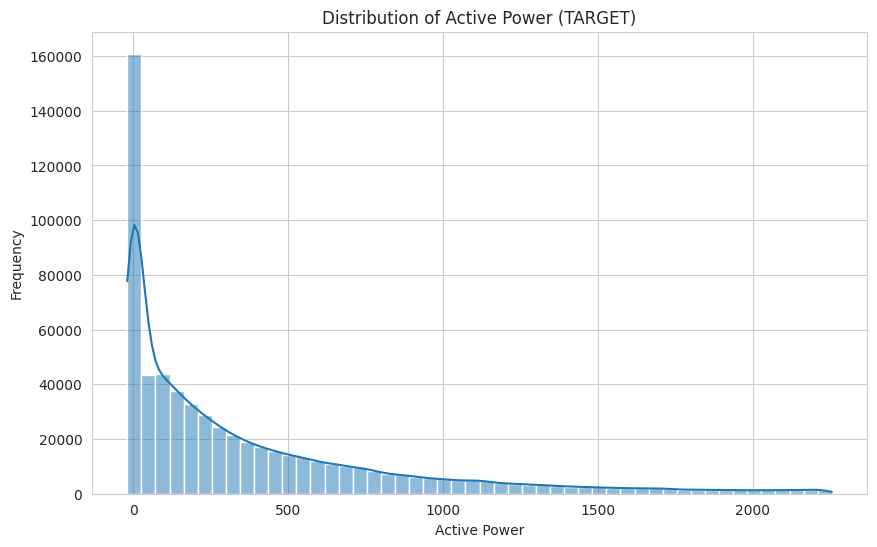

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data['TARGET'], kde=True, bins=50) #kde: une methode pour approximer l'histogramme par une fct continue, bins: nombre de barres
plt.title('Distribution of Active Power (TARGET)')
plt.xlabel('Active Power')
plt.ylabel('Frequency')
plt.show()

## Analyse de la répartition de TARGET par turbine  

Nous utilisons un boxplot pour visualiser la distribution de la puissance active en fonction de chaque turbine.


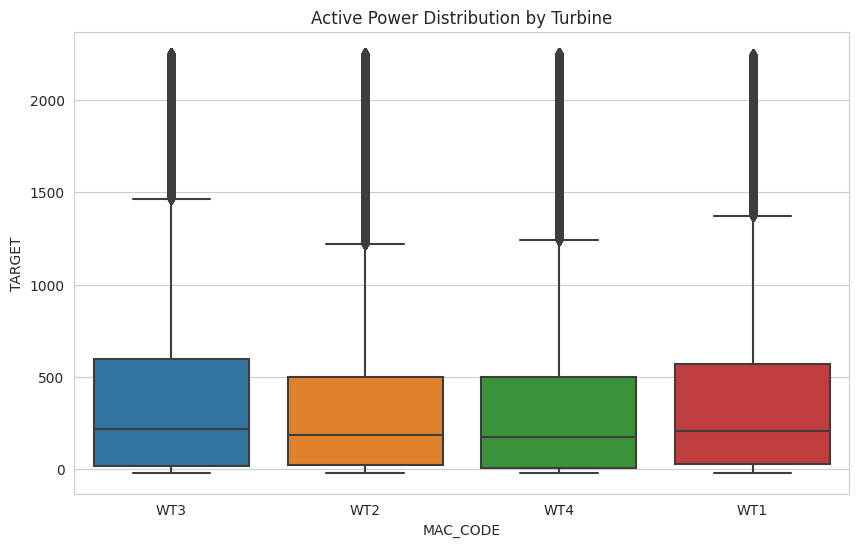

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='MAC_CODE', y='TARGET', data=data)
plt.title('Active Power Distribution by Turbine')
plt.show()

## [Exemple] Relation entre la vitesse du rotor et la puissance active  

Un exemple de correlation: la relation entre `Rotor_speed` et `TARGET` à l’aide d’un scatterplot.


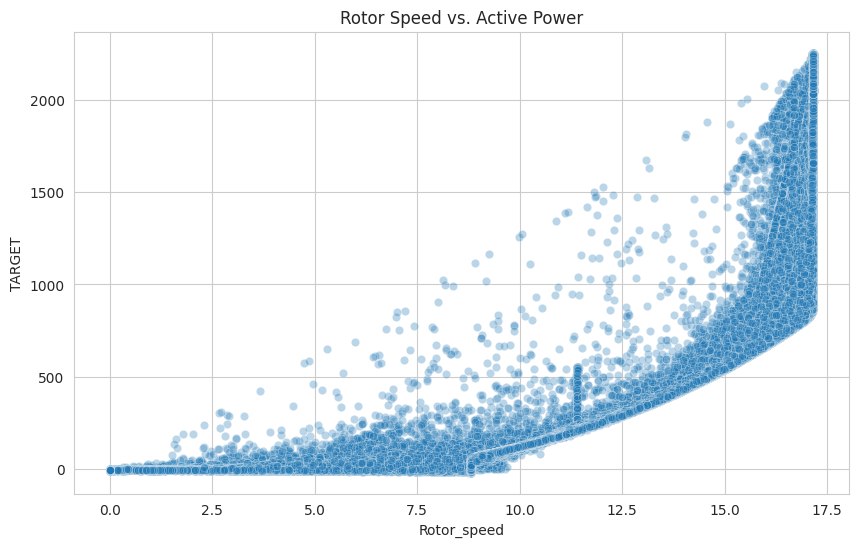

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rotor_speed', y='TARGET', data=data, alpha=0.3)
plt.title('Rotor Speed vs. Active Power')
plt.show()

# Data preprocessing

## Traitement des valeurs manquantes  

Nous identifions les colonnes ayant plus d'un seuil de valeurs manquantes et les supprimons.  


In [11]:
missing_percent = data.isnull().sum() / len(data) * 100
high_missing_threshold = 10  # seuil arbitraire, mais en géneral les memes 4 colonnes se suppriment car elles ont beacoup de données manquantes
high_missing_cols = missing_percent[missing_percent > high_missing_threshold].index.tolist()
data_clean = data.drop(columns=high_missing_cols)
print(f"Dropped columns: {high_missing_cols}")


Dropped columns: ['Grid_voltage', 'Grid_voltage_min', 'Grid_voltage_max', 'Grid_voltage_std']


## Imputation des valeurs manquantes restantes

Les valeurs manquantes des **variables numériques** sont remplacées par la **médiane** pour éviter l’influence des outliers.  


In [12]:
from sklearn.impute import SimpleImputer

numeric_cols = data_clean.select_dtypes(include=np.number).columns.tolist() #selectionner les colonnes ayant des données numeriques
imputer = SimpleImputer(strategy='median') #imputer par la médianne (robuste pour les outliers)
data_imputed = pd.DataFrame(imputer.fit_transform(data_clean[numeric_cols]), columns=numeric_cols)
data_imputed['MAC_CODE'] = data_clean['MAC_CODE']  #restore non-numeric column



In [13]:
remaining_missing = data_imputed.isnull().sum().sum()
print(f"nombre total de valeurs manquantes après imputation : {remaining_missing}")


nombre total de valeurs manquantes après imputation : 0


## Encodage  

Nous utilisons le **one-hot encoding** pour transformer `MAC_CODE` en variables binaires.  


In [14]:
#onehot encode MAC_CODE
data_encoded = pd.get_dummies(data_imputed, columns=['MAC_CODE'])

#ajouter time_step éventuellement pour lstm (laisser date time pour le tri)
data_encoded['time_step'] = data_encoded['Date_time'].astype(int)



In [15]:
print(data_encoded.head())

    ID  Date_time  Pitch_angle  Pitch_angle_min  Pitch_angle_max  \
0  1.0        1.0    92.470001        92.470001        92.470001   
1  2.0        2.0    92.470001        92.470001        92.470001   
2  3.0        3.0    92.470001        92.470001        92.470001   
3  4.0        4.0    92.470001        92.470001        92.470001   
4  5.0        5.0    92.470001        92.470001        92.470001   

   Pitch_angle_std  Hub_temperature  Hub_temperature_min  Hub_temperature_max  \
0              0.0             7.00                  7.0                  7.0   
1              0.0             7.00                  7.0                  7.0   
2              0.0             7.00                  7.0                  7.0   
3              0.0             6.97                  6.7                  7.0   
4              0.0             6.93                  6.0                  7.0   

   Hub_temperature_std  ...  Rotor_bearing_temperature_max  \
0                 0.00  ...               

## Division temporelle "time aware" du dataset (train/test)  

Nous **trions** les données par `Date_time` pour préserver l’ordre temporel, puis nous les séparons en **train (80%)** et **test (20%)**. le tri est essentiel pour l'entrainement de la lstm par la suite, pour eviter tout data leakage  


In [16]:
#time-series split
# triier par Date_time
data_sorted = data_encoded.sort_values('Date_time')


train_size = int(0.8 * len(data_sorted))
train = data_sorted.iloc[:train_size]
test = data_sorted.iloc[train_size:]


X_train = train.drop(columns=['TARGET', 'ID', 'Date_time'])  #drop raw Date_time
y_train = train['TARGET']
X_test = test.drop(columns=['TARGET', 'ID', 'Date_time'])
y_test = test['TARGET']



## Matrice de corrélation des variables numériques  

Nous visualisons la **matrice de corrélation** pour comprendre les relations entre les différentes variables numériques du dataset.  


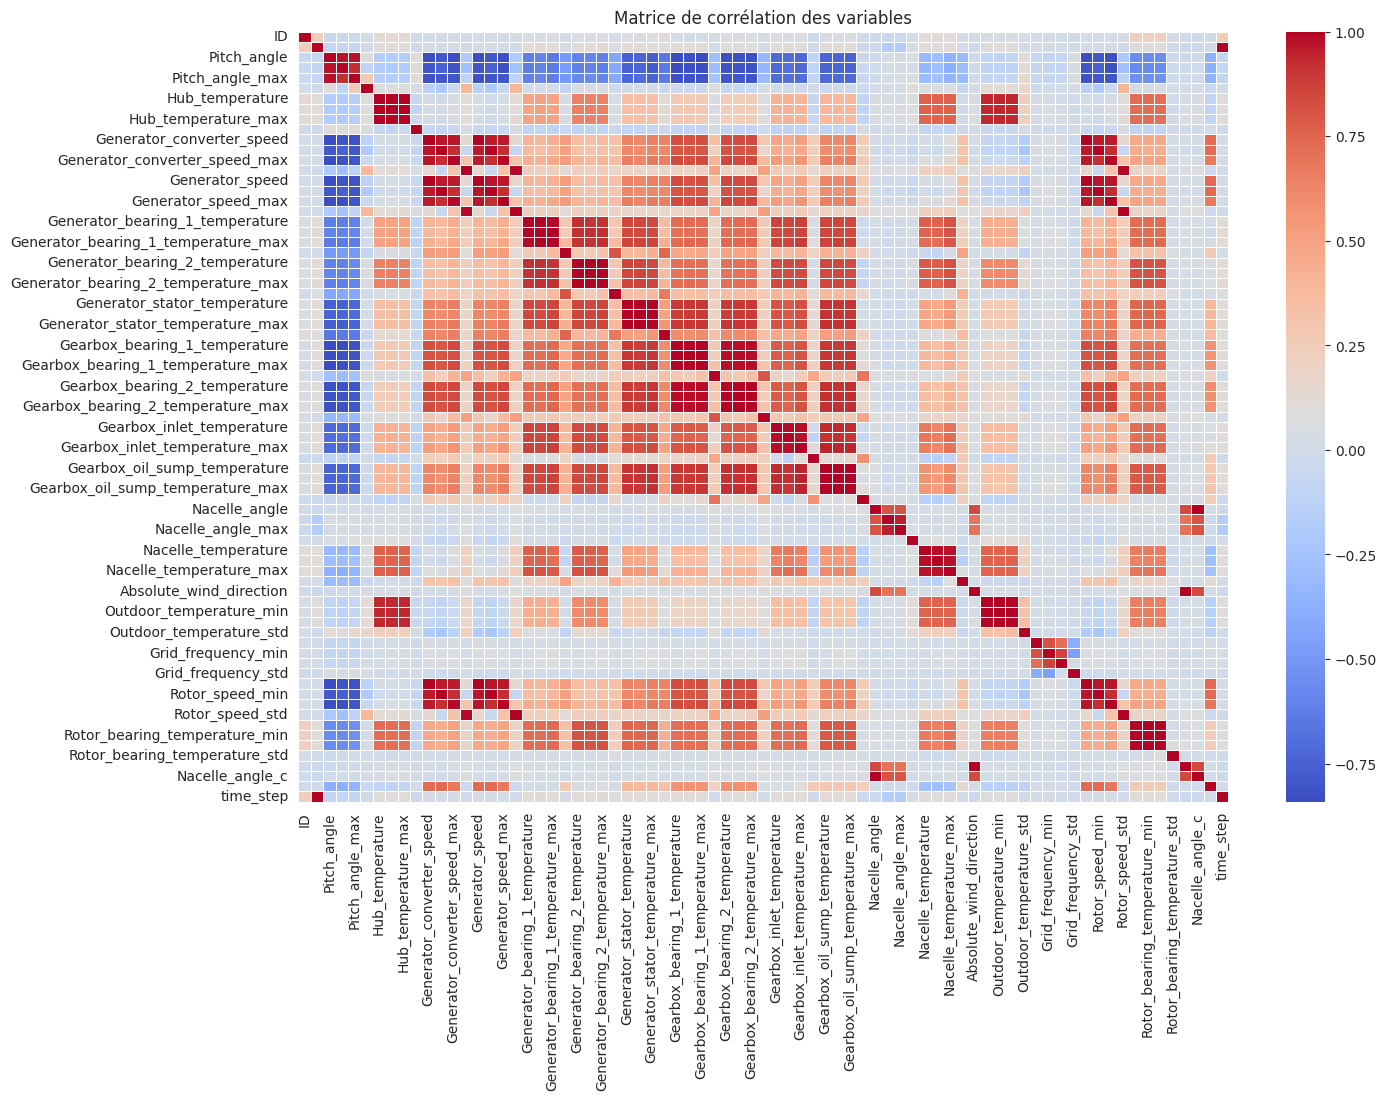

In [17]:
plt.figure(figsize=(15, 10))

sns.heatmap(data_sorted.select_dtypes(include=np.number).corr(), cmap="coolwarm", annot=False, linewidths=0.5)

plt.title('Matrice de corrélation des variables')
plt.show()


## Visualisation des corrélations avec la variable cible `TARGET`  

Nous affichons un **barplot** des **features les moins corrélées** avec `TARGET` pour mieux comprendre leur pertinence. ainsi, on pourra se débarasser de ces features pour alléger notre training pour les modèles qui suivent


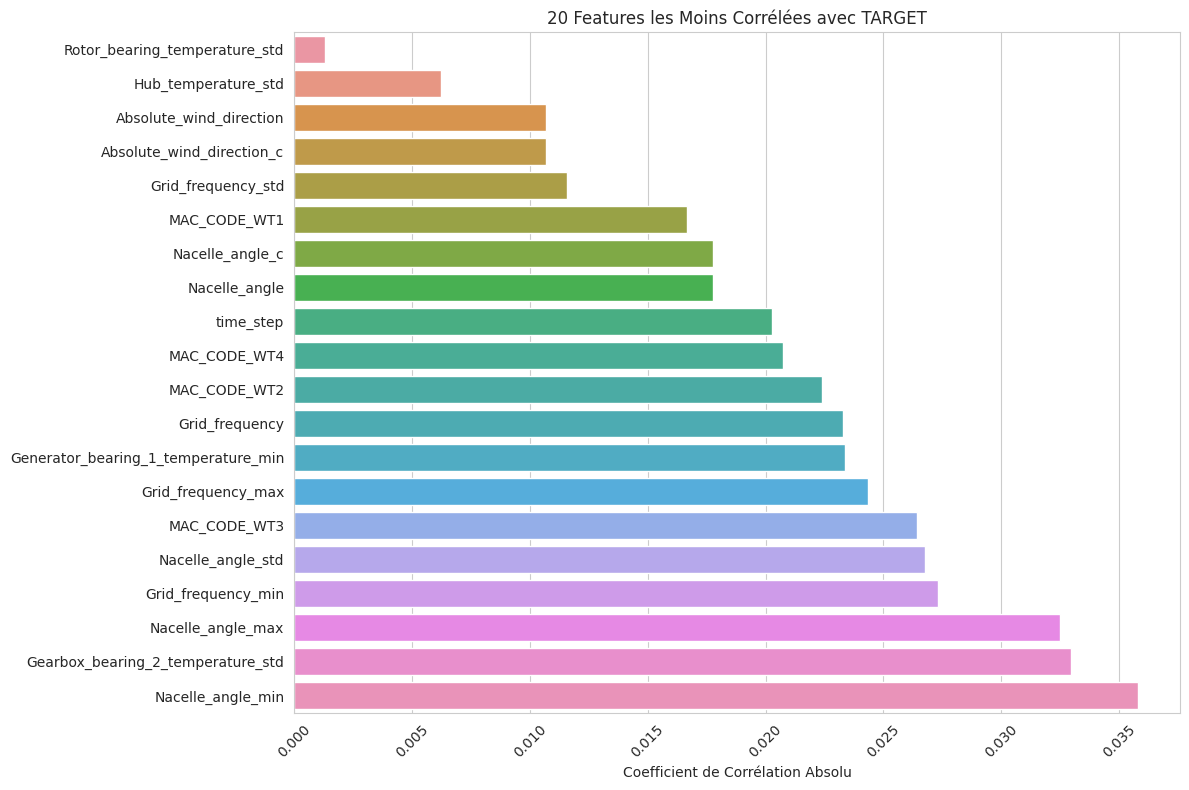


20 features les moins corrélées avec TARGET:
Rotor_bearing_temperature_std          0.001290
Hub_temperature_std                    0.006212
Absolute_wind_direction                0.010683
Absolute_wind_direction_c              0.010701
Grid_frequency_std                     0.011564
MAC_CODE_WT1                           0.016671
Nacelle_angle_c                        0.017765
Nacelle_angle                          0.017776
time_step                              0.020258
MAC_CODE_WT4                           0.020725
MAC_CODE_WT2                           0.022383
Grid_frequency                         0.023299
Generator_bearing_1_temperature_min    0.023368
Grid_frequency_max                     0.024345
MAC_CODE_WT3                           0.026415
Nacelle_angle_std                      0.026762
Grid_frequency_min                     0.027306
Nacelle_angle_max                      0.032468
Gearbox_bearing_2_temperature_std      0.032955
Nacelle_angle_min                      0.0

In [18]:
feature_correlations = X_train.corrwith(y_train).abs().sort_values()

#affichage des 20 features les moins corrélées
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_correlations.values[:20], y=feature_correlations.index[:20])

plt.title('20 Features les Moins Corrélées avec TARGET')
plt.xlabel('Coefficient de Corrélation Absolu')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("\n20 features les moins corrélées avec TARGET:")
print(feature_correlations[:20])


## Sélection des variables pertinentes  

Nous supprimons les **caractéristiques faiblement corrélées** avec la cible `TARGET`, sauf `time_step` qui est préservé pour tout entrainement time aware  


In [19]:
#drop least correlated features with target
corr_threshold = 0.03  # keep features avec | correlation| > 0.03
correlations = pd.DataFrame(X_train).corrwith(y_train).abs()
#Identify weak features but PROTECT time_step
weak_corr_features = correlations[correlations < corr_threshold].index.tolist()
if 'time_step' in weak_corr_features:
    weak_corr_features.remove('time_step')

print(f"Dropping {len(weak_corr_features)} low-correlation features: {weak_corr_features}")

#filter features in both train and test sets
X_train_filtered = X_train.drop(columns=weak_corr_features)
X_test_filtered = X_test.drop(columns=weak_corr_features)

Dropping 16 low-correlation features: ['Hub_temperature_std', 'Generator_bearing_1_temperature_min', 'Nacelle_angle', 'Nacelle_angle_std', 'Absolute_wind_direction', 'Grid_frequency', 'Grid_frequency_min', 'Grid_frequency_max', 'Grid_frequency_std', 'Rotor_bearing_temperature_std', 'Absolute_wind_direction_c', 'Nacelle_angle_c', 'MAC_CODE_WT1', 'MAC_CODE_WT2', 'MAC_CODE_WT3', 'MAC_CODE_WT4']


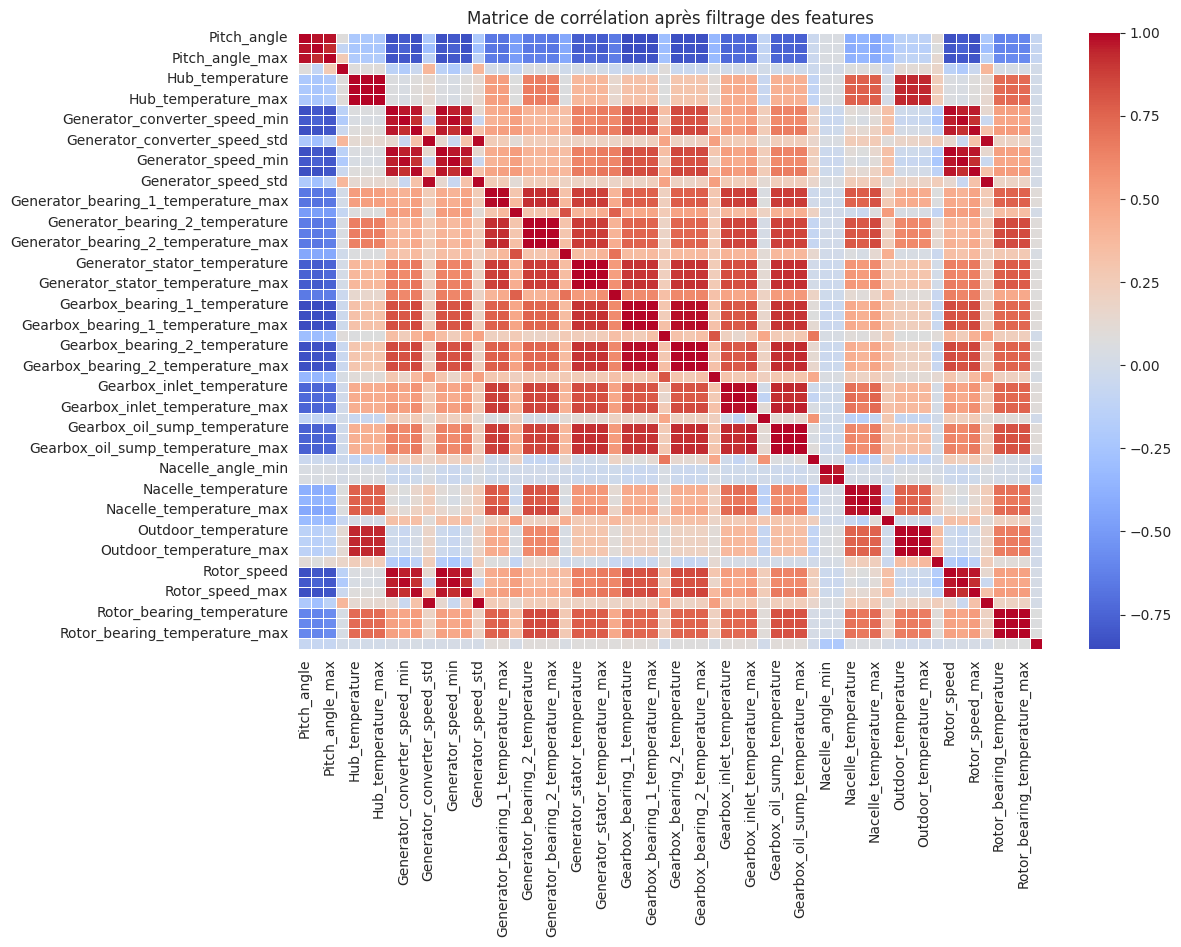

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(X_train_filtered.corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title('Matrice de corrélation après filtrage des features')
plt.show()


## Mise à l’échelle des données  

Nous utilisons un **RobustScaler** pour normaliser les caractéristiques tout en **réduisant l’impact des outliers**.  


In [21]:
#Feature Scaling
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_filtered)
X_test_scaled = scaler.transform(X_test_filtered)

print(f"Final shapes - Train: {X_train_scaled.shape}, test: {X_test_scaled.shape}")

Final shapes - Train: (493908, 60), test: (123478, 60)


# Modèles

## Modèle : Régression Linéaire  

La **régression linéaire** sera utilisée comme un **modèle de référence** pour évaluer la complexité nécessaire des autres modèles.  


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Train
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predict
y_pred_lr = lr.predict(X_test_scaled)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print(f"Linear Regression MAE: {mae_lr:.4f}")

Linear Regression MAE: 89.5095


## Modèle : Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Train
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predict
y_pred_rf = rf.predict(X_test_scaled)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest MAE: {mae_rf:.4f}")

Random Forest MAE: 16.8588


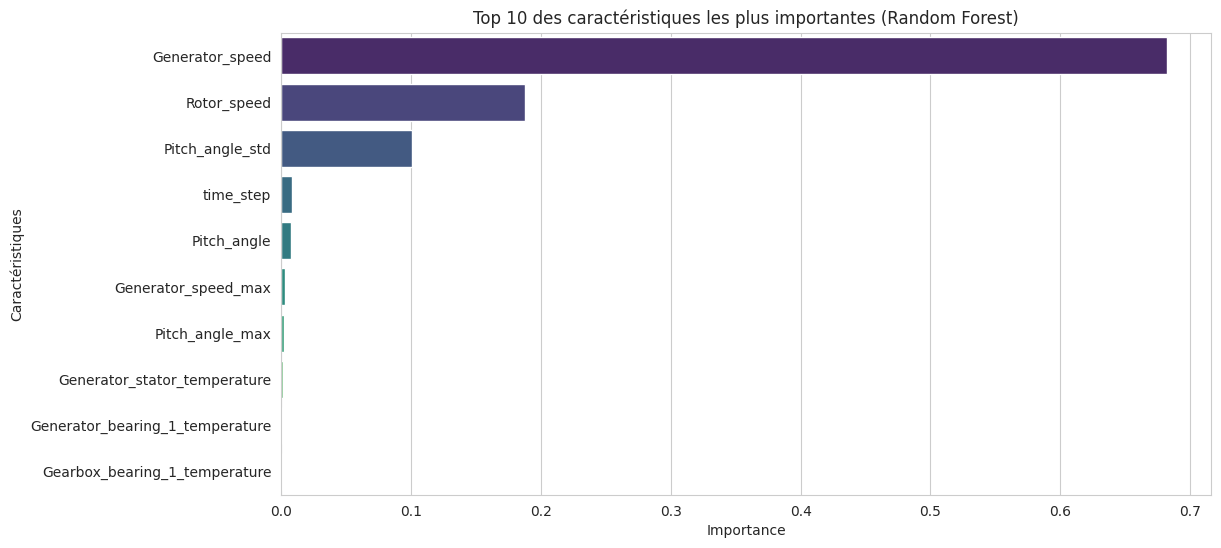

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

#importance des caractéristiques
feature_importance = pd.Series(rf.feature_importances_, index=X_train_filtered.columns)
feature_importance_sorted = feature_importance.sort_values(ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance_sorted[:10], y=feature_importance_sorted.index[:10], palette="viridis")
plt.title("Top 10 des caractéristiques les plus importantes (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Caractéristiques")
plt.show()


## Modèle : XGBoost

In [25]:
import xgboost as xgb



xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test_scaled)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f"XGBoost MAE: {mae_xgb:.4f}")

XGBoost MAE: 14.5502


## Modèle : Réseau de Neurones  

Nous utilisons un **réseau de neurones dense** avec :  
- **2 couches cachées** (64 et 32 neurones)  
- **Relu comme activation**  
- **Dropout pour éviter l’overfitting**  
- **Early stopping** pour éviter un surajustement au dataset d'entraînement  


In [26]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = models.Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  #no activation for regression
])


model.compile(optimizer='adam', loss='mae')

#callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,  #stop if no improvement for 5 epochs
    restore_best_weights=True
)
checkpoint = ModelCheckpoint(
    'best_model.keras',
    save_best_only=True,
    monitor='val_loss'
)

# Train
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,  #early stopping va interrompre si necessaire
    batch_size=1024,
    validation_split=0.2,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

# Evaluate
y_pred_nn = model.predict(X_test_scaled).flatten()
mae_nn = mean_absolute_error(y_test, y_pred_nn)
print(f"Neural Network MAE: {mae_nn:.4f}")


Epoch 1/100
386/386 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 348.5074 - val_loss: 77.8722
Epoch 2/100
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 81.6247 - val_loss: 58.3898
Epoch 3/100
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 66.6127 - val_loss: 49.0155
Epoch 4/100
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 57.0648 - val_loss: 43.6593
Epoch 5/100
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 51.3684 - val_loss: 40.2284
Epoch 6/100
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 47.4403 - val_loss: 37.1901
Epoch 7/100
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 45.0143 - val_loss: 36.6361
Epoch 8/100
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 43.4323 - val_loss: 33.1675
Epoch 9/100
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 42.3887 - val_loss: 34.0459
Epoch 10/100
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 41.2222 - val_loss: 31.6202
Epoch 11/100
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 40.2688 - val_loss: 31.2501
Epoch 12/100
386/3

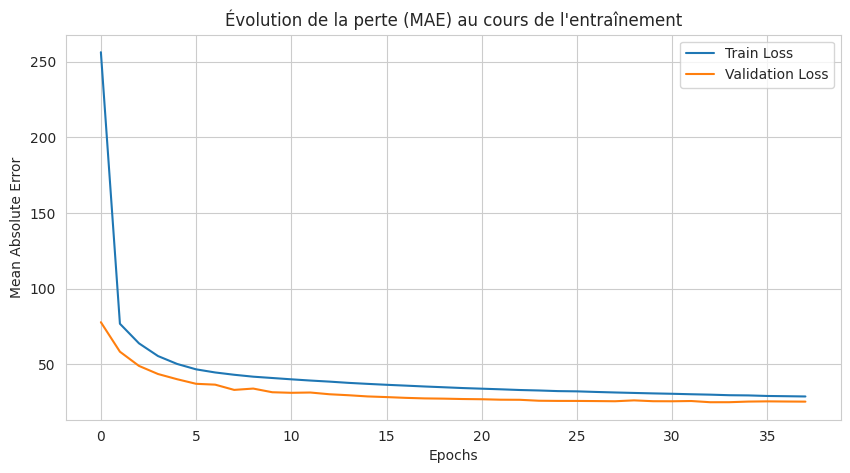

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.title("Évolution de la perte (MAE) au cours de l'entraînement")
plt.legend()
plt.show()

## Modèle : LSTM  

Un **LSTM (Long Short-Term Memory)** pour capturer les dépendances temporelles.  
Nous utilisons ici :  
- **Une couche LSTM** avec 64 unités  
- **Adam comme optimiseur**  
- **Early stopping** pour éviter l’overfitting  


In [28]:
import tensorflow as tf
from tensorflow.keras import layers, models

#reshape data for LSTM (samples, time_steps, features)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])


model_lstm = models.Sequential([
    layers.LSTM(64, input_shape=(1, X_train_scaled.shape[1])),
    layers.Dense(1)
])


model_lstm.compile(optimizer='adam', loss='mae')

#callback
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train
history_lstm = model_lstm.fit(
    X_train_reshaped, y_train,
    epochs=100,
    batch_size=1024,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate
y_pred_lstm = model_lstm.predict(X_test_reshaped).flatten()
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
print(f"LSTM Model MAE: {mae_lstm:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
386/386 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 380.2050 - val_loss: 309.2381
Epoch 2/100
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 362.9045 - val_loss: 294.0166
Epoch 3/100
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 346.1013 - val_loss: 279.1831
Epoch 4/100
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 331.4333 - val_loss: 266.5089
Epoch 5/100
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 317.3947 - val_loss: 254.6356
Epoch 6/100
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 307.5631 - val_loss: 243.1740
Epoch 7/100
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 295.0534 - val_loss: 232.7503
Epoch 8/100
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 284.5889 - val_loss: 223.0560
Epoch 9/100
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 274.6693 - val_loss: 213.7863
Epoch 10/100
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 265.0661 - val_loss: 205.0302
Epoch 11/100
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 256.0306 - val_loss: 196.67

## Comparaison des performances des modèles


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
<ipython-input-30-6c412956b341>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([f"{int(x)}m" for x in ax2.get_yticks()])


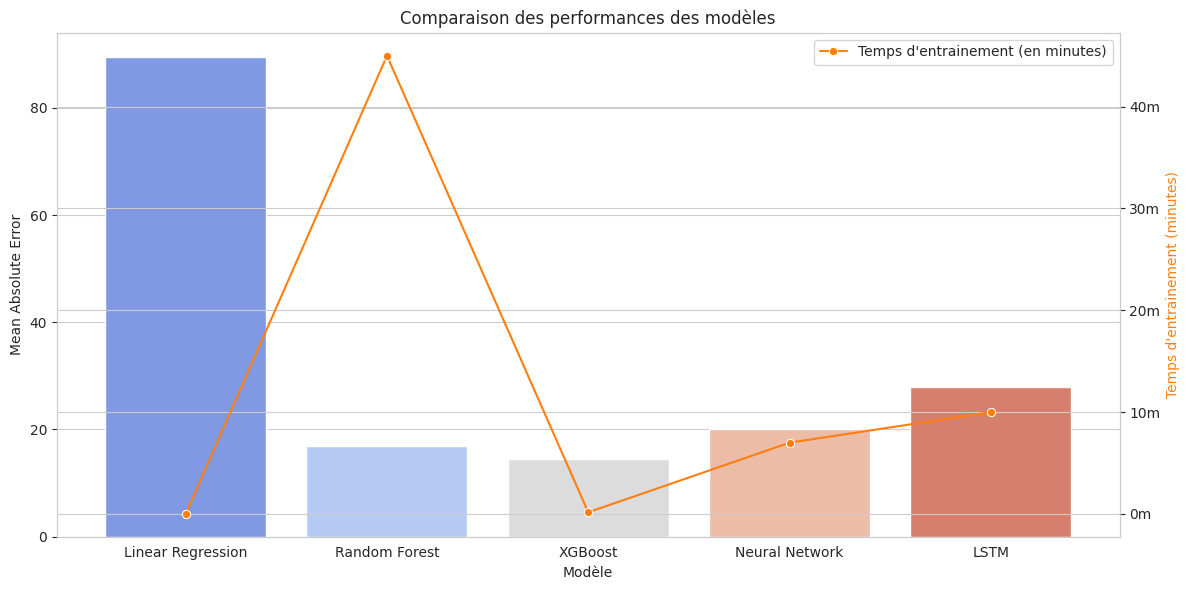

In [30]:
training_times = {
    "Linear Regression": 1,
    "Random Forest": 2700,
    "XGBoost": 10, 
    "Neural Network": 420,
    "LSTM": 600  
}

import matplotlib.pyplot as plt
import seaborn as sns

mae_results = {
    "Linear Regression": mae_lr,
    "Random Forest": mae_rf,
    "XGBoost": mae_xgb,
    "Neural Network": mae_nn,
    "LSTM": mae_lstm
}

training_times_hours = {model: time/60 for model, time in training_times.items()} 


fig, ax1 = plt.subplots(figsize=(12, 6))


sns.barplot(x=list(mae_results.keys()), y=list(mae_results.values()), palette="coolwarm", ax=ax1)
ax1.set_xlabel("Modèle")
ax1.set_ylabel("Mean Absolute Error")
ax1.set_title("Comparaison des performances des modèles")


ax2 = ax1.twinx()
sns.lineplot(x=list(training_times_hours.keys()), y=list(training_times_hours.values()), 
             marker='o', color='tab:orange', ax=ax2, label="Temps d'entrainement (en minutes)")
ax2.set_ylabel("Temps d'entrainement (minutes)", color='tab:orange')


ax2.set_xticks(list(mae_results.keys()))
ax2.set_xticklabels(list(mae_results.keys()), rotation=30)
ax2.set_yticklabels([f"{int(x)}m" for x in ax2.get_yticks()])


fig.tight_layout()
plt.show()
